<center>
    
## <font color='maroon'>ASTR 21000

## Project Description 

## Project 1: Fourier Analysis Via Linear Regression</font>
    
</center>  

### <font color="maroon"> About The Final Project </font>

This notebook contains prompts for one of the 3  final projects options, of which you must select one. You should complete the project to the best of your ability, before your Finals Week meeting with me (Carlo).  

You should have the clean copy of your project in a Jupyter notebook that you submit to Canvas, and email to me.  You must demonstrate the project to me for 20 minutes (or less) during our meeting. You may do so using your own laptop, or on mine.  I will ask you questions about the project, with a view to getting a read on your approach and on your understanding of the statistical methods required.

These projects are not like homework. They are intended to be solved using the concepts that we have developed in class and in the homework sets, but they do also require some independent thought, and creative approaches.  They are *not* easy, and I don't expect perfect solutions (of course, perfect solutions are fine!)

What "completing" the project means is open-ended:  These project descriptions contain some background material, and some prompts.  You should follow some or all those prompts, wherever they lead you.  

Even if the result is something that didn't work, or that you're not satisfied with, that's fine. Bring what you have to the meeting so that I can see how you approached the problem.  Some of these project prompts represent first cracks at open research problems, so it would be absurd for me to expect perfect finished science from you!  The point of the exercise is for you to think scientifically about a problem, using the toolkit provided by this course, and for me to track your thinking.

There are three possible projects that you can select---this notebook describes one possibility.  You must notify me in advance when you select your project.  I will provide you with data customized to your own project work, which you will operate on within the project.  You may switch projects if you so choose, but only after discussing it with me (email is fine).  I *strongly* advise you not to leave the project work to the last moment. Look it over, and start thinking about what to try, at least, well before Finals week.

Your solution notebooks should contain both code for the data analysis and Markdown annotations explaining what you did.  Seriously, don't leave those annotations out.  Code comments are welcome as well.  Keep in mind that I need to understand what you did and why, and try to make your final notebook a clean, clear, communicative document, so that I don't have to work too hard to figure out what's going on.  I do recommend that you also keep one or more scratch notebooks that you just try stuff out in.  I don't need to see those, so they can be as filthy as you like, so long as you understand them.

You may discuss the projects amongst yourselves---that kind of brainstorming is fine, and in fact is how scientists deal with such problems all the time. You may also consult with the TAs, and with me, on general approaches and for coding advice.  You may also, if you so choose, team up with one classmate and do your project together.  In this case, you will come to present your project together, splitting the presentation between the two of you, and you will receive the same grade.

Please do *not* share code, and do *not* share write-ups (except with your team-mate, if you team up).  Roll your own. This will help you own your project, which you definitely want to be the case when it comes time to discuss it with me. I will be far happier with an incomplete project that you appear to understand than with a pretty one that you are at a loss to explain.

As stated in the Syllabus, the project and final interview will count for 10% of your course grade. I will assess your project work based on four criteria:

* **Understanding**: How well does your project work illustrate your grasp of the tools that you used;

* **Completeness**: How completely did you address the prompts;

* **Progress**: How far did you get with what you attempted;

* **Originality**: How interesting was your approach?  Did you find other ways to think about the problem besides the ones that I suggested?

OK, that's it. Have at it.

## <font color="darkblue"> This Project: Fourier Analysis Via Linear Regression </font>

### <font color="darkblue"> Background Material </font>

Suppose that we have a *time series*: at an ordered set of times $t_k$, $k=1,\ldots,N$ such that $0\lt t_1\lt t_2\lt\ldots\lt t_N\lt T$ we have acquired real scalar-valued data $y_k$, $k=1,\ldots,N$.  The $y_k$ could represent X-ray flux observations from a pulsar, or stellar brightness observations from a variable source, or gravitational wave strain observations, or solar activity measurements, for example.  This is a very common data type in astronomy and in other sciences.

Assuming heteroscedastic normally-distributed experimental noise (i.e. different variances $\sigma_k^2$), the statistical model for the data is
$$
Y_k=f(t_k)+\epsilon_k \quad;\quad \epsilon_k\sim\mathcal{N}(0,\sigma_k^2),
$$
for some model function $f(t)$. The data $y_k$ are samples from the RVs $Y_k$.

A very common model for $f(t)$ is a *Fourier Series*:
$$
f(t)=a_0 + \sum_{k=1}^\infty \left[
a_k^{(c)}\cos\left(\frac{2\pi k}{T}t\right) + a_k^{(s)}\sin\left(\frac{2\pi k}{T}t\right)
\right].
$$

This type of series representation is a powerful alternative to Taylor series.  It turns out that any smooth integral function on the domain $(0,T)$ can be represented uniquely in this way.  The representation is interesting because it allows us to represent *multiple superposed periodicities*: the terms $\cos\left(\frac{2\pi k}{T}t\right)$ and $\sin\left(\frac{2\pi k}{T}t\right)$ are periodic with period $T/k$.  

Should the coefficients $a_k^{(s)},a_k^{(c)}$ due to one value of $k$ dominate the others in the series, it would be evidence of a periodic effect in the physics responsible for the observations (for example, an exoplanet orbital period).

Typically, one cares principally about the *power spectrum* $s_k$ of the series, defined as
$$
s_0 \equiv a_0^2 \quad;\quad s_k\equiv a_k^{(c)\,2} + a_k^{(s)\,2},\, k>0.
$$

This is the influence of the periodicity $T/k$ on $f(t)$, and is referred to as the *power* in mode $k$.

Extracting power spectra from time series is a major enterprise of statistical analysis. If (when) you encounter the terms *discrete Fourier Transform* (DFT) or *Fast Fourier Transform* (FFT), this is the subject concerned. Fourier analysis is a very large, dense subject, whose details will not detain us here.

In practice, one never extracts an infinite number of $s_k$, of course. Instead, one approximates $f(t)$ by truncating the series to a finite number $B$ of modes, i.e.
$$
f(t)\approx a_0 + \sum_{k=1}^B \left[
a_k^{(c)}\cos\left(\frac{2\pi k}{T}t\right) + a_k^{(s)}\sin\left(\frac{2\pi k}{T}t\right)
\right].
$$

With this approximation, the statistical model becomes
$$
Y_k = a_0 + \sum_{k=1}^B \left[
a_k^{(c)}\cos\left(\frac{2\pi k}{T}t_k\right) + a_k^{(s)}\sin\left(\frac{2\pi k}{T}t_k\right)
\right]+\epsilon_k \quad;\quad \epsilon_k\sim\mathcal{N}(0,\sigma_k^2).
$$

**It will surely not have escaped your attention that *this is a linear model* in the Fourier coefficients $a_0, a_k^{(c)}, a_k^{(s)}$.**   The only difference with the polynomial models discussed in class and in the homework is that the basis of functions are the periodic functions $\cos\left(\frac{2\pi k}{T}t\right), \sin\left(\frac{2\pi k}{T}t\right)$, instead of the monomials ${x_l}^k$.

### <font color="darkblue"> Project Prompts </font>

You will receive your own customized dataset.  It will look like some version of this:

<center>
<img width=1000 src="https://web.cels.anl.gov/~cgraziani/ASTRO21000/Fourier_data.png"></img>
</center>

Assume that your Fourier series should be truncated at $B=20$.  

1. Plot your own data.  Always do that first.

2. Obviously, you need to perform inference on the linear coefficients $\mathbf{a}$. Can you see how to adapt the polynomial regression method to this case? The target should be the mean and covariance of the $\mathbf{a}$.

3. Can your model predict the time-series at times not actually observed?
    * Between actual observations? 
    * Outside the observation window?
    * Can it exhibit the uncertainty in the prediction?

5. What can you say about the spectrum, $s_k$?  It's quadratic in the $\mathbf{a}$, so getting its statistical distribution at each mode $k$ in closed form is non-trivial.  
    * Could a posterior sampling approach work here?
    * Would you expect to get good credible regions for the $s_k$ using a $\pm\sigma$ type of approach? What might be an alternative approach? Could quantiles be better?
    * Is there any gain in understanding of the spectrum if you plot it in log-linear, or log-log coordinates?
    * Is there any "special" frequency mode where the spectrum is significantly higher than it is at nearby modes?
    * Are the $s_k$ at different $k$ correlated or uncorrelated? Can you think of some way to display their correlations?

6. You could try experimenting with values of $B$ that are larger, or smaller than 20, to see what happens. 

### Plot of Data

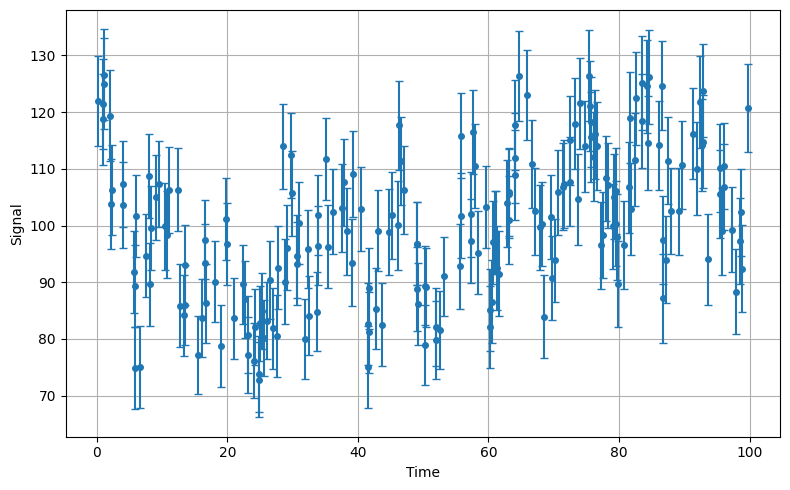

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the data
data = np.loadtxt('time_series.txt')

# Extract columns
t = data[:, 0]      # Time
signal = data[:, 1] # Signal
sigma = data[:, 2]  # Std. Dev

# Plot
plt.figure(figsize=(8,5))
plt.errorbar(t, signal, yerr=sigma, fmt='o', markersize=4, capsize=3)

plt.xlabel('Time')
plt.ylabel('Signal')
plt.grid(True)
plt.tight_layout()
plt.show()

### Fourier Regression

In [28]:
# TODO

### Predictive Distribution

Let's place a prior on the Fourier coefficients $\mathbb{a}$. Choosing a Gaussian prior, we have $$\mathbb{a} \sim \mathcal{N}(0, \Sigma_0).$$ With Gaussian observational noise (heteroscedastic but known $\sigma_k$), he posterior over $\mathbb{a}$ is Gaussian and the predictive distribution for $f(t)$ is Gaussian also: 
$$\mathbb{a} \mid y \sim \mathcal{N} (\mu_{post}, \Sigma_{post})$$
where $\mu_{post} = \Sigma_{post} X^\top Wy$ and $\Sigma_{post}=(X^\top WX + \Sigma_0^{-1})^{-1}$. It follows that $$f(t_*) \mid y \sim \mathcal{N}(X_* \mu_{post}, X_* \Sigma_{post} X_*^\top).$$ 

In [29]:
B = 20   # number of Fourier modes

# Observation window length
T = t.max() - t.min()

def build_design_matrix(t, B, T):
    N = len(t)
    cols = [np.ones(N)]  # a0 term
    for k in range(1, B+1):
        w = 2*np.pi*k/T
        cols.append(np.cos(w*t))
        cols.append(np.sin(w*t))
    X = np.column_stack(cols)
    return X

X = build_design_matrix(t, B, T)
p = X.shape[1]

# Prior
tau2 = 1e4 # I put this here arbitrarily
Sigma0 = np.eye(p) * tau2   # prior covariance
invSigma0 = np.eye(p) / tau2  # prior precision

# Observational precision matrix W
W = W = np.diag(1.0 / (sigma**2))

# Posteriors
XTW_X = X.T @ W @ X      # shape (p,p)
XTW_y = X.T @ W @ signal # shape (p,)

# Posterior precision and covariance
post_precision = XTW_X + invSigma0
Sigma_post = np.linalg.inv(post_precision)
mu_post = Sigma_post @ XTW_y

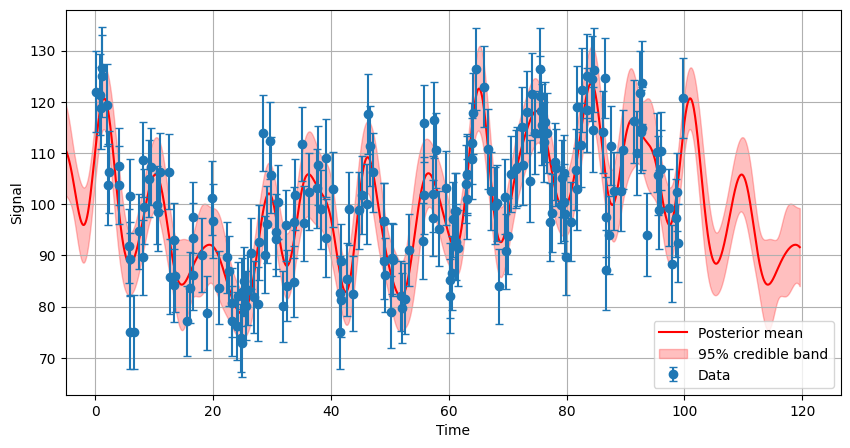

In [ ]:
# Predictive mean
tpred = np.linspace(t.min() - 0.2*(t.max()-t.min()),
                    t.max() + 0.2*(t.max()-t.min()), 2000)

Xpred = build_design_matrix(tpred, B, T)
fmean = Xpred @ mu_post
fvar = np.sum((Xpred @ Sigma_post) * Xpred, axis=1)   # diag(X Sigma X^T)
fstd = np.sqrt(fvar)

cred_level = 0.95
z = norm.ppf(0.5 + cred_level/2) # two sided z score

# Plot posterior mean
plt.figure(figsize=(10,5))
plt.plot(tpred, fmean, 'r-', label='Posterior mean')
plt.fill_between(tpred, fmean - 1.96*fstd, fmean + 1.96*fstd, color='r', alpha=0.25,
                 label='95% credible interval')
plt.errorbar(t, signal, yerr=sigma, fmt='o', capsize=3, label='Data')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.xlim(-5)
plt.legend(); plt.grid(True); plt.show()

### Power Spectrum $s_k$

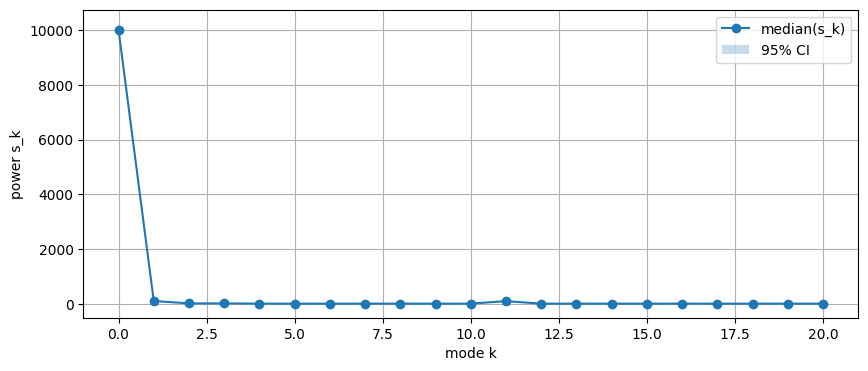

In [31]:
# Posterior samples
nsamples = 5000
samples = np.random.multivariate_normal(mean=mu_post, cov=Sigma_post, size=nsamples)

# Compute s_k for each sample
s_samples = np.zeros((nsamples, B+1))
s_samples[:,0] = samples[:,0]**2
idx = 1
for k in range(1, B+1):
    ac = samples[:, idx]
    as_ = samples[:, idx+1]
    s_samples[:, k] = ac**2 + as_**2
    idx += 2

# summary quantiles for spectrum
s_med = np.median(s_samples, axis=0)
s_lo = np.percentile(s_samples, 2.5, axis=0)
s_hi = np.percentile(s_samples, 97.5, axis=0)

modes = np.arange(B+1)
plt.figure(figsize=(10,4))
plt.plot(modes, s_med, '-o', label='median(s_k)')
plt.fill_between(modes, s_lo, s_hi, alpha=0.25, label='95% CI')
plt.xlabel('mode k')
plt.ylabel('power s_k')
plt.legend(); plt.grid(True); plt.show()

#### Log scale

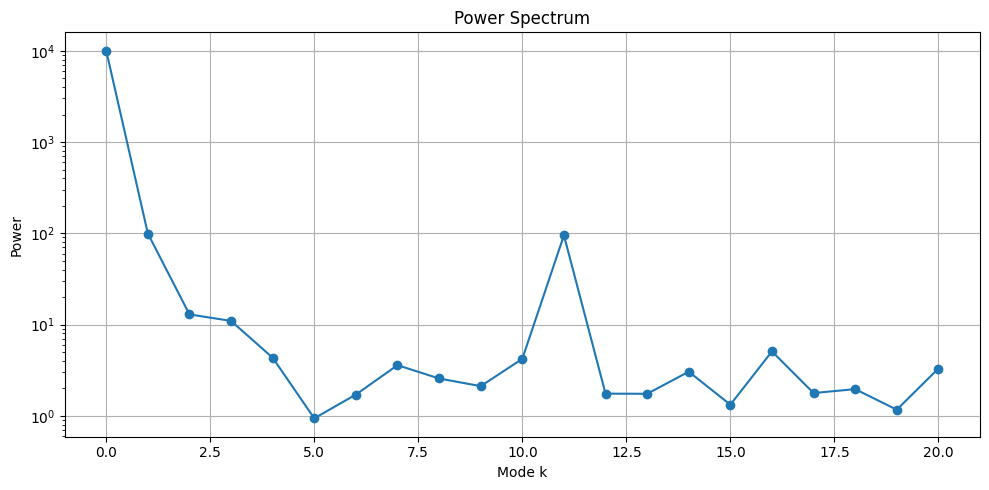

In [32]:
plt.figure(figsize=(10,5))
plt.semilogy(modes, s_med, '-o')
plt.xlabel('Mode k') # frequency index
plt.ylabel('Power')
plt.title('Power Spectrum')
plt.grid(True)
plt.tight_layout()
plt.show()